In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lotus-jpg/lotus.jpg
/kaggle/input/dhirubhai-and-mukesh-ambani/dhirubhai.avif


In [6]:
import PIL
from PIL import Image
import requests
import copy
import matplotlib.pyplot as plt

In [7]:
from transformers import AutoProcessor, AutoModelForCausalLM

In [8]:
model_name = "microsoft/Florence-2-large"
processor = AutoProcessor.from_pretrained(model_name, trust_remote_code=True)

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


In [9]:
pip install flash_attn einops

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.5 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.1 MB/s eta 0:00:00
  Created wheel for flash_attn: filename=flash_attn-2.6.1-cp310-cp310-linux_x86_64.whl size=198130327 sha256=2e7a4ae16d20c1c7981f7a9f9a1833b9b528997b990d97c4a6d6d38d3574c773
  Stored in directory: /root/.cache/pip/wheels/91/6a/38/f0faa036b4ac73a73247386f1ab1bb4cb4f6e72e6861a779f1
Successfully built flash_attn
Note: you may need to restart the kernel to use updated packages.


In [10]:
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True)

modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

In [32]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM 


model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

#prompt = "<OD>"

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

# prompt=task_prompt +text_input
def run_flourence2(prompt):
    inputs = processor(text=prompt, images=image, return_tensors="pt")

    generated_ids = model.generate(
                     input_ids=inputs["input_ids"],
                     pixel_values=inputs["pixel_values"],
                     max_new_tokens=1024,
                     num_beams=3,
                     do_sample=False,
                     early_stopping=False)
    
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

    parsed_answer = processor.post_process_generation(generated_text, task=prompt, image_size=(image.width, image.height))

    print(parsed_answer)

In [33]:
prompt='<CAPTION>'
run_flourence2(prompt)

{'<CAPTION>': '\nA green car parked in front of a yellow building.\n'}


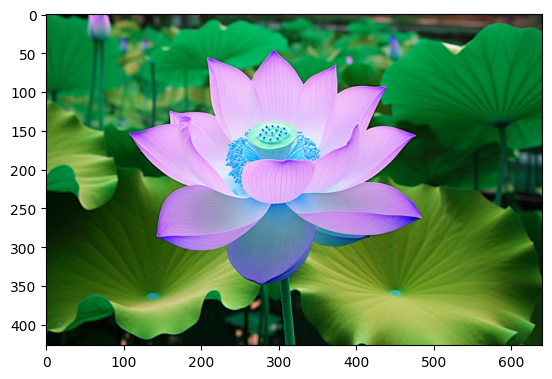

In [41]:
import cv2
from PIL import Image
image_matrix2=cv2.imread(r'/kaggle/input/lotus-jpg/lotus.jpg')
#image=Image.open(image_matrix2)
image=plt.imshow(image_matrix2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

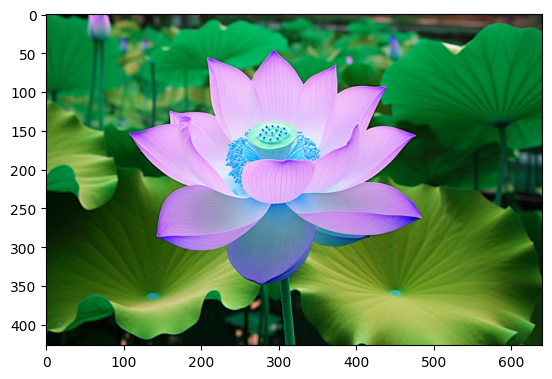

In [44]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM 


model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

#prompt = "<OD>"

#url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
#image = Image.open(requests.get(url, stream=True).raww
# prompt=task_prompt +text_input

import cv2
image_matrix2=cv2.imread(r'/kaggle/input/lotus-jpg/lotus.jpg')
#image=Image.open(image_matrix2)
image=plt.imshow(image_matrix2)

In [52]:
# Define the function
def run_florence2(prompt, image_path):
    # Load the processor and model
    #processor = Florence2Processor.from_pretrained('microsoft/Florence-2-large')
    #model = Florence2Model.from_pretrained('microsoft/Florence-2-large')

    processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

    model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)
    
    # Read the image from the specified path using OpenCV
    image_matrix2 = cv2.imread(image_path)
    
    # Convert the image to RGB format
    image_rgb = cv2.cvtColor(image_matrix2, cv2.COLOR_BGR2RGB)

    # Convert the image to a PIL Image
    image_pil = Image.fromarray(image_rgb)

    # Process the text and image inputs
    inputs = processor(text=prompt, images=image_pil, return_tensors="pt")

    # Generate the output
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_length=50,
        num_beams=5,
        do_sample=False,
        early_stopping=False
    )

    # Decode the generated text
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    # Get image dimensions
    width, height = image_pil.size
    
    # Post-process the generated text (if necessary, this depends on the specific model and use case)
    # This line is just illustrative; adjust as needed based on the actual processor's available methods
    parsed_answer = processor.post_process_generation(generated_text, task=prompt, image_size=(width, height))
    
    return parsed_answer

# Example usage
prompt = "<CAPTION>"
image_path = '/kaggle/input/lotus-jpg/lotus.jpg'
output_text = run_florence2(prompt, image_path)
print(output_text)

{'<CAPTION>': 'A pink lotus flower in the middle of a pond of green leaves.'}


# LETS EE THE RESULT FOR ANOTHER IMAGE and this time get DETAILED CAPTION from flourence2

In [54]:
# Define the function
def run_florence2(prompt, image_path):
    # Load the processor and model
    processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

    model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)
    
    # Read the image from the specified path using OpenCV
    image_matrix2 = cv2.imread(image_path)
    
    # Convert the image to RGB format
    image_rgb = cv2.cvtColor(image_matrix2, cv2.COLOR_BGR2RGB)

    # Convert the image to a PIL Image
    image_pil = Image.fromarray(image_rgb)

    # Process the text and image inputs
    inputs = processor(text=prompt, images=image_pil, return_tensors="pt")

    # Generate the output
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_length=50,
        num_beams=5,
        do_sample=False,
        early_stopping=False
    )

    # Decode the generated text
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    # Get image dimensions
    width, height = image_pil.size
    
    # Post-process the generated text (if necessary, this depends on the specific model and use case)
    # This line is just illustrative; adjust as needed based on the actual processor's available methods
    parsed_answer = processor.post_process_generation(generated_text, task=prompt, image_size=(width, height))
    
    return parsed_answer

# Example usage
prompt = "<DETAILED_CAPTION>"
image_path = '/kaggle/input/cat2-jpg/cat.jpg'
output_text = run_florence2(prompt, image_path)
print(output_text)

{'<DETAILED_CAPTION>': 'The image shows a small orange kitten laying on top of a wooden table in the foreground, with a metal object in the middle and plants and trees in the background. The background is slightly blurred, giving the image a dreamy feel.'}


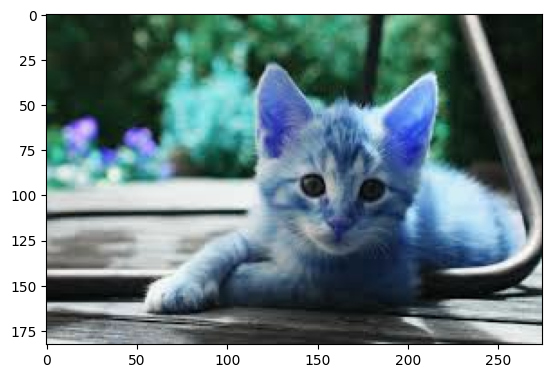

In [55]:
image_matrix3=cv2.imread(image_path)
plt.imshow(image_matrix3)